# NFL Analysis

In this project I'm going to use the nfl big data bowl 2023 data from Kaggle to create visualizations that will help analyze the plays of each team during the first 8 weeks of the 2021 season. The idea is create a dashboard in Streamlit with information of each team, players and game by game.

As in the data we have information about each play, we can plot and analyze how each team moved during each down, and the play that led to a touchdown. We can also show how a player moved around the field in each game or in each play. In the team information we can add the information to show how both teams, ofense and defense, moved on the field and probably show some statistics, like number of passes per match, total yards run per match, and others that we find in the data as we explore and analyze it

## Importing libraries

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

# Configuration
pd.options.display.max_columns = None

## Reading data

### Games

In this file we have the information of each game the columns present in this file are

|Column|Description|
|------|-----------|
|**gameId**|Game identifier, unique|
|season|Season of the game|
|week|Weef of the game|
|gameDate|Game Date (mm/dd/yy)|
|gameTimeEastern|Start time of game time, HH:MM:SS)|
|homeTeamAbbr|Home team three-letter code|
|visitonTeamAbbr|Visiting team three letter code|


In [2]:
games = pd.read_csv('./games.csv', parse_dates=['gameDate'])
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,2021-09-09,20:20:00,TB,DAL
1,2021091200,2021,1,2021-09-12,13:00:00,ATL,PHI
2,2021091201,2021,1,2021-09-12,13:00:00,BUF,PIT
3,2021091202,2021,1,2021-09-12,13:00:00,CAR,NYJ
4,2021091203,2021,1,2021-09-12,13:00:00,CIN,MIN


In [3]:
games.dtypes

gameId                      int64
season                      int64
week                        int64
gameDate           datetime64[ns]
gameTimeEastern            object
homeTeamAbbr               object
visitorTeamAbbr            object
dtype: object

In [4]:
games.shape

(122, 7)

## play data
In this file we find information about the play happened in each moment of the game. The columns present in this file are:

|Column|Description|
|------|-----------|
|**gameId**|Game identifier, unique|
|**playId**|Play identifier, not unique across games|
|playDescription|Description of play|
|quarter|Game quarter|
|down|Down|
|yardsToGo|Distance needed for a first down|
|possessionTeam|Team abbreviation of team on offense with possession of ball|
|defensiveTeam|Team abbreviation of team on defense|
|yardlineSide|three letter team code corresponding to line-to-scrimmage|
|yarlineNumber|Yard line-of-scrimmage|
|gameClock|Time on clock of play (MM:SS)|
|preSnapHomeScore|Home score prior to the play|
|preSnapVisitorScore|Visiting team score prior to the play|
|passResult|Dropback outcome of the play (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, R: Scramble)|
|penaltyYards|yards gained by offense by penalty|
|prePenaltyPlayResult|Net yards gained by the offense, before penalty yardage|
|playResult|Net yards gained by the offense, including penalty yardage|
|foulName[i]|Name of the i-th penalty committed during the play. i ranges between 1 and 3|
|foulNFLId|nflId of the player who comitted the i-th penalty during the play. i ranges between 1 and 3|
|absoluteYardlineNumber|Distance from end zone for possession team|
|offenseFormation|Formation used by possession team|
|personne10|Personel used by offensive team|
|defendersInTheBox|Personnel used by offensive team|
|personnelID|Personnel used by defensive team|
|dropbackType|Dropback categorization of quaterback|
|pff_playAction|Indicatior for whether offense executes play action fake on the play. Variable proved by PFF|
|pff_passCoverage|Coverage scheme of defense. Variable provided by PFF<br>Possible values:<br>* Cover-0: A Man to Man coverage across the board with no deep defenders. This coverage is typically accompanied with a blitz<br>* Cover-1: When a defense plays any form of Man defense across the board with a Defensive Player as a Single High Man concept<br>* Cover-2: A two deep safety concept where any zone principle is applied<br>2-Man: A two deep safety concept where a man principle is applied<br>* Cover-3: Any 3 Deep, 4 Under concept<br>* Quarters: A Quarters concept on both halves of the field. In general it will be a 4 Deep, 3 Under concept where the corners are on #1, safeties on #2, and backside safety rotation dependent on formation<br>* Cover-6: A Quarters Concept on half the field and a 2 Deep concept on the other half<br>* Bracket: Recorded in the field and up to the 12 yard line in the red zone – when two offensive players have an in and out bracket by two defenders<br>* Goal Line: Calls where a Goal Line defense is used.<br>* Red Zone: Calls that are typically specific to the Red Zone and do not occur in the field often<br>* Prevent: Special end of half or end of game situations where a Prevent defense is utilized<br>* Miscellaneous: Coverage concepts that we feel do not comfortably fit into any of our coverage|
|pff_passCoverageType|Whether defense's coverage type was man, zone or other. Variable provided by PFF|

In [5]:
play = pd.read_csv('./plays.csv')
play.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,13:18,0,0,C,NaN,28,28,NaN,NaN,NaN,NaN,NaN,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,12:23,0,0,C,NaN,5,5,NaN,NaN,NaN,NaN,NaN,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,09:56,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,09:46,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [6]:
play.dtypes

gameId                      int64
playId                      int64
playDescription            object
quarter                     int64
down                        int64
yardsToGo                   int64
possessionTeam             object
defensiveTeam              object
yardlineSide               object
yardlineNumber              int64
gameClock                  object
preSnapHomeScore            int64
preSnapVisitorScore         int64
passResult                 object
penaltyYards              float64
prePenaltyPlayResult        int64
playResult                  int64
foulName1                  object
foulNFLId1                float64
foulName2                  object
foulNFLId2                float64
foulName3                  object
foulNFLId3                float64
absoluteYardlineNumber    float64
offenseFormation           object
personnelO                 object
defendersInBox            float64
personnelD                 object
dropBackType               object
pff_playAction

### Player Data
In this file we find information about the players of each team. The columns present in this file are
|Column|Description|
|------|-----------|
|**nflId**|Player identification number, unique across players|
|height|Player height|
|weight|Player weight|
|birthDate|Date of birth|
|collegeName|Player College|
|officialPosition|Official player position|
|displayName|Player Name|

In [7]:
players = pd.read_csv('./players.csv')
players.head()

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


The heights of each player are in imperial units, however its beign separated by a "-" symbol instead of "'", so i'm going to change them, and also I'm going to change the units to meters and show both units in the final product

In [8]:
players['heightSplit'] = players['height'].str.split('-')
players['heightM'] = round((int(players['heightSplit'][0][0]) * 30.48) + (int(players['heightSplit'][0][1]) * 2.54), 0) / 100
players.drop(columns=['heightSplit'], inplace=True)
players['height'] = players['height'].str.replace('-',"'")
players.head()

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,heightM
0,25511,6'4,225,1977-08-03,Michigan,QB,Tom Brady,1.93
1,28963,6'5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,1.93
2,29550,6'4,328,1982-01-22,Arkansas,T,Jason Peters,1.93
3,29851,6'2,225,1983-12-02,California,QB,Aaron Rodgers,1.93
4,30078,6'2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,1.93


### PFF Scouting Data

In this file we find complementary information about a play. This information was extracted from Pro Football Focus, which is a company that focuses on generating analysis on NFL and NCAA games, the relationship with other tables is made with the nflId column. The columns that we find in this file are:
|Column|Description|
|------|-----------|
|**gameId**|Game Id, unique|
|**playId**|Play identifier, not unique across games|
|**nflId**|Player identification number|
|pff_role|The player's role on this play<br>Possible values:<br>* Coverage: Defensive player. Player whose initial goal is to play man or zone coverage<br>* Pass: Offensive player. Player identified as the passer<br>* Pass block: Offensive player. Anyone fully blocking a defender from the QB, or anyone in a clear pass block stance<br>* Pass route: Offensive player. Any player not identified as a Pass Blocker or Passer<br>* Pass rush: Defensive player. Any player whose initial intent is to rush the passer<br>|
|pff_positionLinedUp|Position that the player was aligned at the snap of the ball on this play|
|pff_hit|If player is a defensive player, indicator for whether they are credited with recording a hit on this play|
|pff_hurry|If player is a defensive player, indicator for whether they are credited with recording a hurry on this play|
|pff_sack|If player is a defensive player, indicator for whether they are credited with recording a sack on this play|
|pff_beatenByDefender|If player is a blocking offensive player, indicator for whether they are by a defender but was not charged for yielding a hit, hurry or sack|
|pff_hitAllowed|If player is a blocking offensive player, indicator for whether they are responsible for a hit on the QB|
pff_hurryAllowed|If player is a blocking offensive player, indicator for whether they are responsible for a hurry on the QB|
|pff_sackAllowed|If player is a blocking offensive player, indicator for whether they are responsible for a sack on the QB|
|pff_nflIdBlockedPlayer|If player is a blocking offensive player, the nflId of the first defender the offensive player blocked|
|pff_blockType|If player is a blocking offensive player, the type of block that the offensive player is executing on the defender<br>Possible values:<br>* BH: Backfield Help - A block from a player aligned in the backfield on which the blocker merely helps on a block rather than fully engaging his assignment. Usually seen when a blocker is clearing up a block or picking up a defender when he has broken through or been missed by another blocker<br>* CH: Chip Block - This is only to be used for players who chip a pass rusher when they release for their route<br>* CL: Second Level – A block made at the second level, this must be at least two yards across the line of scrimmage<br>* NB: No Block - If a blocker executes no block on a play but simply runs his path or takes his pass set then we will note him with one all blocking line with this block type<br>* PA: Play Action Pass Protection - A blocker pass protecting inline on a play action pass selling the play action by stepping in to show a run block before converting to pass protect<br>* PP: Pass Protection - A standard pass protection block from an inline blocker<br>* PR: Pocket Roll Block - This block type will be used any time the offense is executing a “rolling pocket” by which the entire offensive line moves with the QB’s rollout to stay in front of him but without ever taking a “conventional” pass set. There will be flexibility here to record the PR – Pocket Roll Block type in the same way as PA & RP block types in that individual matchups & responsibilities won’t always be obvious or necessary, so PR block types can be recorded by multiple blockers on an individual defender on the same play<br>* PT: Post Block - A post block by an offensive player in pass protection to control a defender for another blocker while clearly demonstrating that he is not, at least initially, trying to fully engage with the block<br>* PU: Backfield Pickup - A pass protection pick-up by a player aligned in the backfield<br>* SR: Set & Release - A blocker who sets to pass protect a defender before releasing. This block will cover both players releasing from a set to block for a screen as well as “hold ups” by tight ends before they leak into the flat<br>* SW: Switch Block - A blocker who passes off (or attempts to pass off) a defender. Most often used on stunts but can also be used for pass offs when pass rushers are slanting across the pocket or interior defenders are working to the edge to replace a dropping edge rusher, with an interior offensive lineman passing them out rather than staying with them<br>* UP: Pull Pass Protection - A blocker pulling in pass protection from an inline alignment to block a defender in pass protection|
|pff_backFieldBlock|If player is a blocking offensive player, indicator for whether block occured in offensive backfield|

In [9]:
scouting = pd.read_csv('./pffScoutingData.csv')
scouting.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0


In [10]:
scouting.dtypes

gameId                      int64
playId                      int64
nflId                       int64
pff_role                   object
pff_positionLinedUp        object
pff_hit                   float64
pff_hurry                 float64
pff_sack                  float64
pff_beatenByDefender      float64
pff_hitAllowed            float64
pff_hurryAllowed          float64
pff_sackAllowed           float64
pff_nflIdBlockedPlayer    float64
pff_blockType              object
pff_backFieldBlock        float64
dtype: object

### Tracking Data

This is the data for each week, as we said previously we are analyzing the data for the first eight weeks of the 2021 season. Each file contains player data for each week
The columns present in this files are:

|Column|Description|
|------|-----------|
|**gameId**|Game identifier, unique|
|**playId**|Play identifier, not unique across games|
|**nflId**|Player identification number, unique across players. When value is NA, row corresponds to ball|
|frameId|Frame identifier for each play, starting at 1|
|time|Time stamp of play (time, yyyy-mm-dd, hh:mm:ss)|
|jerseyNumber|Jersey number of player|
|club|Team abbrevation of corresponding player|
|playDirection|Direction that the offense is moving|
|x|Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below.|
|y|Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below.|
|s|Speed in yards/second|
|a|Acceleration in yards/second^2|
|dis|Distance traveled from prior time point, in yards|
|o|Player orientation (deg), 0 - 360 degrees|
|dir|Angle of player motion (deg), 0 - 360 degrees|
|event|Tagged play details, including moment of ball snap, pass release, pass catch, tackle, etc|

![](./assets/images/field.png)


## Creating the game field



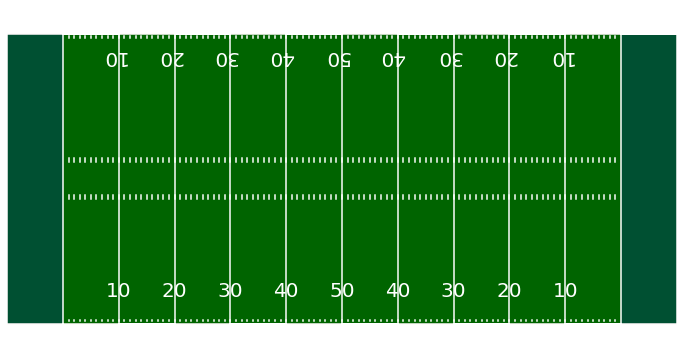

In [11]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

create_football_field()
plt.show()